In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay


C:\Users\MACHIRA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MACHIRA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\MACHIRA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/MACHIRA/Downloads/data.csv')
df.head()

,Browsing,Communication,Documentation,Email,Meetings,Miscellaneous,Online Meetings,Operations,Private,System Tools,System Utilities,Testing,Work,Terminated
0,0.172761,0.408960,1.777557,2.243530,2.851692,0.0,0.117019,0.062778,0.0,0.133816,0.0,0.066000,0.317818,0
1,0.273351,0.949990,1.940660,2.162945,2.304740,0.0,0.429066,0.143683,0.0,0.234842,0.0,0.054167,0.345989,0
2,0.316184,1.189710,0.903404,2.279299,2.192019,0.0,0.373033,1.182396,0.0,0.191184,0.0,0.054852,0.245042,0
3,0.490175,1.669911,0.951240,1.730520,1.181128,0.0,0.381167,0.642517,0.0,0.245565,0.0,0.095423,0.654631,0
4,0.290220,1.223133,1.162363,3.060535,0.466788,0.0,0.146220,2.217705,0.0,0.593714,0.0,0.014583,0.146939,0


In [3]:
df.dtypes

Browsing            float64
Communication       float64
Documentation       float64
Email               float64
Meetings            float64
Miscellaneous       float64
Online Meetings     float64
Operations          float64
Private             float64
System Tools        float64
System Utilities    float64
Testing             float64
Work                float64
Terminated            int64
dtype: object

In [4]:
df.isnull().sum()

Browsing            0
Communication       0
Documentation       0
Email               0
Meetings            0
Miscellaneous       0
Online Meetings     0
Operations          0
Private             0
System Tools        0
System Utilities    0
Testing             0
Work                0
Terminated          0
dtype: int64

In [5]:
df.shape

(1027, 14)

In [6]:
df.describe()

,Browsing,Communication,Documentation,Email,Meetings,Miscellaneous,Online Meetings,Operations,Private,System Tools,System Utilities,Testing,Work,Terminated
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000
mean,0.171736,0.919624,1.599142,1.287912,0.683109,0.018608,0.114069,1.486949,0.000610,0.367135,0.000004,0.107714,0.161924,0.122687
std,0.174691,0.545519,1.015168,0.817417,0.603220,0.243808,0.142324,1.079386,0.009300,0.368702,0.000130,0.174317,0.333526,0.328238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091522,0.512797,0.906118,0.675619,0.359318,0.000000,0.020329,0.664714,0.000000,0.173415,0.000000,0.000000,0.008333,0.000000
50%,0.129477,0.820193,1.380799,1.145910,0.512843,0.000000,0.077362,1.305983,0.000000,0.273949,0.000000,0.041191,0.061819,0.000000
75%,0.206650,1.183169,2.022473,1.712766,0.795305,0.000000,0.155349,2.057768,0.000000,0.432540,0.000000,0.158063,0.189154,0.000000
max,3.014452,4.386082,6.444863,5.329466,8.767778,6.602778,1.878125,5.948273,0.256113,4.508907,0.004167,1.928529,4.489029,1.000000


In [7]:
df['Terminated'].value_counts()

0    901
1    126
Name: Terminated, dtype: int64

In [8]:
#Separating the target variable and the features
x = df.drop('Terminated', axis=1)
y = df['Terminated']


In [9]:
#Scaling the numerical feature to avoid any outliers in the data
def scale_df(x):
    scaler = MinMaxScaler()
    names = x.columns
    scaler.fit(x)
    scaled_num = scaler.transform(x)
    scaled_num_cols = pd.DataFrame(scaled_num, columns=names)
    return scaled_num_cols

X = scale_df(x)
X

,Browsing,Communication,Documentation,Email,Meetings,Miscellaneous,Online Meetings,Operations,Private,System Tools,System Utilities,Testing,Work
0,0.057311,0.093240,0.275810,0.420967,0.325247,0.0,0.062307,0.010554,0.0,0.029678,0.0,0.034223,0.070799
1,0.090680,0.216592,0.301117,0.405847,0.262865,0.0,0.228455,0.024155,0.0,0.052084,0.0,0.028087,0.077074
2,0.104889,0.271247,0.140174,0.427679,0.250008,0.0,0.198620,0.198780,0.0,0.042401,0.0,0.028442,0.054587
3,0.162608,0.380729,0.147597,0.324708,0.134712,0.0,0.202951,0.108017,0.0,0.054462,0.0,0.049480,0.145829
4,0.096276,0.278867,0.180355,0.574267,0.053239,0.0,0.077854,0.372832,0.0,0.131676,0.0,0.007562,0.032733
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,0.123971,0.261762,0.267019,0.118205,0.021892,0.0,0.193603,0.354827,0.0,0.070454,0.0,0.002161,0.000000
1023,1.000000,0.056175,0.000000,0.027468,0.000000,0.0,0.000000,0.000700,0.0,0.001848,0.0,0.000000,0.000000
1024,0.038539,0.328533,0.202855,0.481607,0.049947,0.0,0.000000,0.234062,0.0,0.052290,0.0,0.000000,0.000000
1025,0.278075,0.173809,0.460561,0.088206,0.098815,0.0,0.003698,0.127924,0.0,0.060741,0.0,0.000000,0.011138


In [10]:
#Creating the Naive bayes model for Train and test
def naive_bayes_classifier(x, y):
    
    model = GaussianNB()
    model.fit(x, y)
    
    return model

#splitting and fitting the model the original data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .4, shuffle=False)
gnb = naive_bayes_classifier(x, y)#Fitting the model on the original data
train_unscaled_pred = gnb.predict(x_train)

#splitting and fitting the model the scaled data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = .4, shuffle=False)
gnb = naive_bayes_classifier(X, y) #Fitting the model on scaled data
train_scaled_pred = gnb.predict(train_x)

#fining the accuracy score on Train data
print("Accuracy for Unscaled Train Data:", metrics.accuracy_score(y_train,train_unscaled_pred))
print( metrics.confusion_matrix(y_train,train_unscaled_pred))
print("Accuracy for Scaled Train Data:", metrics.accuracy_score(y_train,train_scaled_pred))
print( metrics.confusion_matrix(y_train,train_scaled_pred))

<IPython.core.display.Javascript object>

Accuracy for Unscaled Train Data: 0.8181818181818182


<IPython.core.display.Javascript object>

[[496  20]
 [ 92   8]]


<IPython.core.display.Javascript object>

Accuracy for Scaled Train Data: 0.8376623376623377


<IPython.core.display.Javascript object>

[[514   2]
 [ 98   2]]


In [11]:
#fining the accuracy score on Test data
test_unscaled_pred = gnb.predict(x_test)
print("Accuracy for Unscaled Test Data:", metrics.accuracy_score(y_test,test_unscaled_pred))
print(metrics.confusion_matrix(y_test,test_unscaled_pred))

test_scaled_pred = gnb.predict(test_x)
print("Accuracy for Scaled Test Data:", metrics.accuracy_score(y_test,test_scaled_pred))
print(metrics.confusion_matrix(test_y,test_scaled_pred))

<IPython.core.display.Javascript object>

Accuracy for Unscaled Test Data: 0.44282238442822386


<IPython.core.display.Javascript object>

[[165 220]
 [  9  17]]


<IPython.core.display.Javascript object>

Accuracy for Scaled Test Data: 0.927007299270073


<IPython.core.display.Javascript object>

[[380   5]
 [ 25   1]]


In [12]:
print("F1 score for Unscaled data:", f1_score(y_test, test_unscaled_pred))
print("F1 score Scaled Data:", f1_score(test_y, test_scaled_pred))

F1 score for Unscaled data: 0.12927756653992395
F1 score Scaled Data: 0.0625


In [13]:
score = roc_auc_score(y_test,test_unscaled_pred)
print(f"ROC AUC Unscaled: {score:.4f}")

ROC AUC Unscaled: 0.5412


In [14]:
score = roc_auc_score(test_y, test_scaled_pred)
print(f"ROC AUC Scaled: {score:.4f}")

ROC AUC Scaled: 0.5127


ROC AUC Unscaled Data: 0.5537


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ROC AUC Scaled Data: 0.6816


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

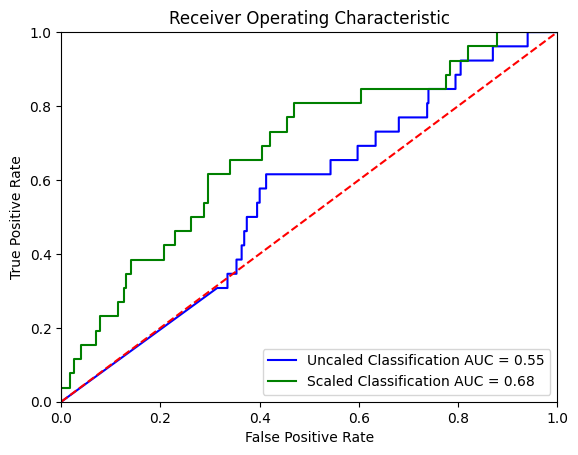

In [15]:
#ROC AUC Unscaled data
test_Proba = gnb.predict_proba(x_test)
score = roc_auc_score(y_test,test_Proba[:, 1])
print(f"ROC AUC Unscaled Data: {score:.4f}")

# calculate the fpr and tpr for all thresholds of the classification
preds = test_Proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'Uncaled Classification AUC = %0.2f' % roc_auc)




#ROC AUC Scaled data
test_proba = gnb.predict_proba(test_x)
score = roc_auc_score(test_y,test_proba[:, 1])
print(f"ROC AUC Scaled Data: {score:.4f}")

# calculate the fpr and tpr for all thresholds of the scaled Classification
preds = test_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr, tpr)



#ploting the ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'Scaled Classification AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()